# Simulation Project
- Negin Mashayekhi 98243054
- Parsa Noori 98243067

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import random
import warnings
import scipy.linalg

## Request 1

Functions

In [2]:
# Function to calculate algebraic connectivity
def calculate_algebraic_connectivity(graph):
    laplacian_matrix = nx.laplacian_matrix(graph).toarray()
    eigenvalues = np.linalg.eigvals(laplacian_matrix)
    sorted_eigenvalues = np.sort(eigenvalues)
    algebraic_connectivity = sorted_eigenvalues[1]  # Smallest non-zero eigenvalue
    return algebraic_connectivity

# Function to calculate spectral gap
def calculate_spectral_gap(graph):
    adjacency_matrix = nx.adjacency_matrix(graph).toarray()
    eigenvalues = np.linalg.eigvals(adjacency_matrix)
    sorted_eigenvalues = np.sort(eigenvalues)
    spectral_gap = sorted_eigenvalues[-1] - sorted_eigenvalues[-2]  # Difference between largest and second largest eigenvalues
    return spectral_gap
    
# Function to calculate natural connectivity
def calculate_natural_connectivity(graph):
    eigenvalues = nx.linalg.spectrum.normalized_laplacian_spectrum(graph)
    natural_connectivity = sum([abs(e) for e in eigenvalues])
    return natural_connectivity

# Function to calculate energy and Laplacian energy
def calculate_energy(graph):
    eigenvalues = nx.linalg.spectrum.laplacian_spectrum(graph)
    energy = sum([abs(e) for e in eigenvalues])
    laplacian_energy = sum([e**2 for e in eigenvalues])
    return energy, laplacian_energy

def calculate_metrics(graph,n):
    natural_connectivity = calculate_natural_connectivity(graph)
    energy, laplacian_energy = calculate_energy(graph)
    algebraic_connectivity = calculate_algebraic_connectivity(graph)
    spectral_gap = calculate_spectral_gap(graph)
    return n,natural_connectivity, energy, laplacian_energy, algebraic_connectivity,spectral_gap

Code

In [3]:
graph_params = [(1000, 0.004), (750, 0.004), (500, 0.008), (250, 0.017), (100, 0.004)]
metrics_er = pd.DataFrame(columns=['N','Natural Connectivity', 'Energy', 'Laplacian Energy', 'Algebraic Connectivity', 'Spectral Gap'])
metrics_sf = pd.DataFrame(columns=['N','Natural Connectivity', 'Energy', 'Laplacian Energy', 'Algebraic Connectivity', 'Spectral Gap'])
metrics_ws = pd.DataFrame(columns=['N','Natural Connectivity', 'Energy', 'Laplacian Energy', 'Algebraic Connectivity', 'Spectral Gap'])
for n, p in graph_params:
    graph = nx.erdos_renyi_graph(n, p)
    metrics = calculate_metrics(graph,n)
    metrics_er = pd.concat([metrics_er, pd.DataFrame([metrics], columns=metrics_er.columns)], ignore_index=True)
    
    
    graph = nx.barabasi_albert_graph(n, 2)
    metrics = calculate_metrics(graph,n)
    metrics_sf = pd.concat([metrics_sf, pd.DataFrame([metrics], columns=metrics_sf.columns)], ignore_index=True)
    
    
    graph = nx.watts_strogatz_graph(n, 4, 0.3)
    metrics = calculate_metrics(graph,n)
    metrics_ws = pd.concat([metrics_ws, pd.DataFrame([metrics], columns=metrics_ws.columns)], ignore_index=True)

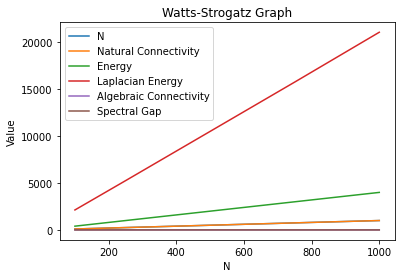

In [4]:
for col in metrics_ws.columns:
    plt.plot(metrics_ws['N'], metrics_ws[col], label=col)

plt.xlabel('N')
plt.ylabel('Value')
plt.title('Watts-Strogatz Graph')
plt.legend()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


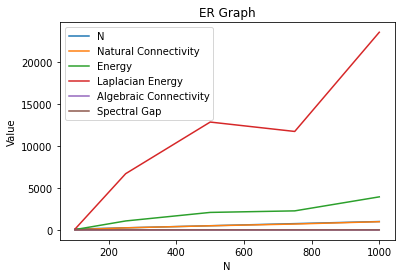

In [5]:
for col in metrics_er.columns:
    plt.plot(metrics_er['N'], metrics_er[col], label=col)

plt.xlabel('N')
plt.ylabel('Value')
plt.title('ER Graph')
plt.legend()
plt.show()

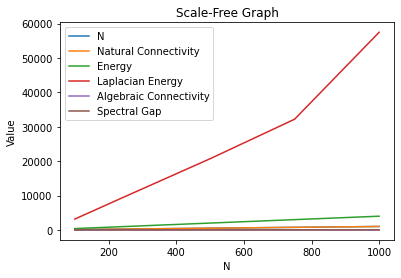

In [6]:
for col in metrics_sf.columns:
    plt.plot(metrics_sf['N'], metrics_sf[col], label=col)

plt.xlabel('N')
plt.ylabel('Value')
plt.title('Scale-Free Graph')
plt.legend()
plt.show()

### Algebraic Connectivity of ER is maximum.

## Request 2

The time complexity of the function is O(n1*d1)

Functions

In [7]:
def RSRBG(n1, n2, d1, d2, draw_plot = True):
    timeout_count = 0
    start_time = time.time()
    max_execution_time = 4  # Maximum execution time in seconds
    timeout = True

    while timeout:
        timeout = False
        G = nx.Graph()
        # Add nodes to group1
        group1_nodes = [f'G1-{i + 1}' for i in range(n1)]
        G.add_nodes_from(group1_nodes, group='group1', value_degree=d1)

        # Add nodes to group2
        group2_nodes = [f'G2-{i + 1}' for i in range(n2)]
        G.add_nodes_from(group2_nodes, group='group2', value_degree=d2)

        max_cycles = n1 * d1 * 1000

        while any(G.nodes[node]['value_degree'] > 0 for node in G.nodes):
            if max_cycles == 0:
                timeout = True
                timeout_count += 1

            # Choose one node from each group
            node1 = random.choice(group1_nodes)
            node2 = random.choice(group2_nodes)

            if node1 != node2 and not G.has_edge(node1, node2):
                # If there is no edge between the chosen nodes, add the edge
                G.add_edge(node1, node2)
                G.nodes[node1]['value_degree'] -= 1
                G.nodes[node2]['value_degree'] -= 1

            max_cycles -= 1

        if draw_plot:
            #Draw the graph
            plt.figure(figsize=(20, 10))
            pos = nx.spring_layout(G)
            colors = ['red' if G.nodes[node]['group'] == 'group1' else 'blue' for node in G.nodes]
            nx.draw_networkx_nodes(G, pos, node_color=colors)
            nx.draw_networkx_edges(G, pos)
            plt.show()

    return G, timeout_count

In [9]:
# functions that we need in request2
def caclulate_metrics(graph):    
    natural_connectivity = calculate_natural_connectivity(graph)
    energy, laplacian_energy = calculate_energy(graph)
    algebraic_connectivity = calculate_algebraic_connectivity(graph)
    spectral_gap = calculate_spectral_gap(graph)
    return natural_connectivity,energy, laplacian_energy,algebraic_connectivity,spectral_gap


def calculate_degree_distribution(graph):
    degrees = [graph.degree(node) for node in graph.nodes()]
    degree_counts = np.bincount(degrees)
    degree_distribution = degree_counts / np.sum(degree_counts)
    return degree_distribution

def calculate_eigenvalue_distribution(graph):
    eigenvalues = nx.linalg.spectrum.adjacency_spectrum(graph)
    eigenvalue_distribution = np.histogram(eigenvalues, bins=10, range=(min(eigenvalues), max(eigenvalues)))[0]
    return eigenvalue_distribution

def draw_distributions(graph):
    # Calculate degree distribution
    degree_distribution = calculate_degree_distribution(graph)

    # Calculate eigenvalue distribution
    eigenvalue_distribution = calculate_eigenvalue_distribution(graph)

    # Calculate other parameters and measures
    spectral_gap = max(eigenvalue_distribution) - eigenvalue_distribution[-2]
    algebraic_connectivity = min(eigenvalue_distribution[eigenvalue_distribution != 0])
    natural_connectivity = sum(np.abs(eigenvalue_distribution))
    # symmetry_ratio = d1 / (d1 + d2)
    energy = np.sum(np.abs(eigenvalue_distribution))
    laplacian_energy = np.sum(np.square(eigenvalue_distribution))

    plt.subplot(121)
    plt.hist(degree_distribution, bins='auto',color='orange')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title('Degree Distribution Histogram')

    # Plot eigenvalue distribution
    plt.subplot(122)
    plt.plot(range(len(eigenvalue_distribution)), eigenvalue_distribution, 'bo-')
    plt.xlabel('Eigenvalue Bin')
    plt.ylabel('Density')
    plt.title('Eigenvalue Distribution')

    plt.tight_layout()
    plt.show()
    



Code

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/lib/histograms.py:852: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)


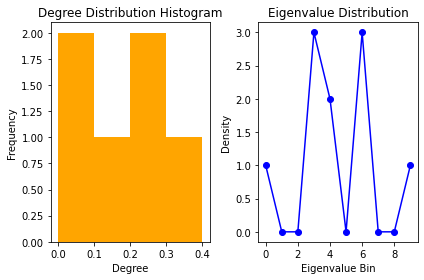

0


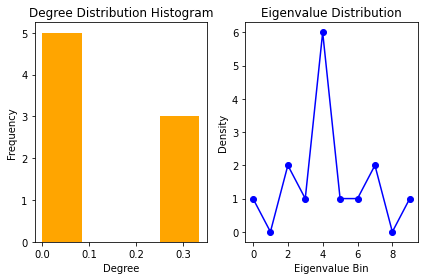

0


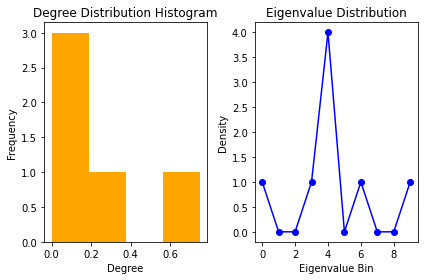

0


,nc,e,le,ac,sg
0,10.0,36.0,174.0,1.636246,2.368057+0.000000j
1,15.0,56.0,302.0,1.105109,1.883389+0.000000j
2,8.0,30.0,144.0,2.354249,3.000000+0.000000j


In [10]:
# create the graph multy times and store results in a dataframe
request2_df = pd.DataFrame(columns=['nc', 'e', 'le', 'ac', 'sg'])
inputs = [[6,4,2,3],[5,10,4,2],[4,4,3,3]]

for i in range(len(inputs)):
    n1,n2,d1,d2 = inputs[i]
    graph, timeout_count = RSRBG(n1,n2,d1,d2,draw_plot=False)
    metrics = caclulate_metrics(graph)
    request2_df = pd.concat([request2_df, pd.DataFrame([metrics], columns=request2_df.columns)], ignore_index=True)
    draw_distributions(graph)
    print(timeout_count)
request2_df

Calculate parameters for ER

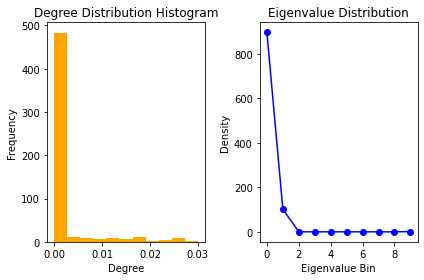

In [19]:
draw_distributions(er_graph)

## Request 3

The function's time complexity is O(n1 * d1 / p).

Functions

In [24]:
def RSRG(n, d1, d2, p, draw_plot= True):
    return RSRBG(int(n * p), n - int(n * p), d1, d2, draw_plot=draw_plot)


def calculate_metrics(graph):
    nc = len(graph.nodes)
    e = len(graph.edges)
    ac = nx.average_clustering(graph)
    sg = nx.average_node_connectivity(graph)
    
    # Calculate average shortest path length if the graph is connected
    if nx.is_connected(graph):
        le = nx.average_shortest_path_length(graph)
    else:
        le = float("inf")  # Set a large value for disconnected graphs
    
    return nc, e, le, ac, sg

def draw_distributions(graph, d1, d2):
    # Calculate degree distribution
    degree_distribution = calculate_degree_distribution(graph)

    # Calculate eigenvalue distribution
    eigenvalue_distribution = calculate_eigenvalue_distribution(graph)

    # Calculate other parameters and measures
    spectral_gap = max(eigenvalue_distribution) - eigenvalue_distribution[-2]
    algebraic_connectivity = min(
        eigenvalue_distribution[eigenvalue_distribution != 0])
    natural_connectivity = sum(np.abs(eigenvalue_distribution))
    symmetry_ratio = d1 / (d1 + d2)
    energy = np.sum(np.abs(eigenvalue_distribution))
    laplacian_energy = np.sum(np.square(eigenvalue_distribution))

    # Plot degree distribution
    plt.subplot(121)
    plt.hist(degree_distribution, bins='auto', color='orange')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title('Degree Distribution Histogram')

    # Plot eigenvalue distribution
    plt.subplot(122)
    plt.plot(range(len(eigenvalue_distribution)),
             eigenvalue_distribution, 'bo-')
    plt.xlabel('Eigenvalue Bin')
    plt.ylabel('Density')
    plt.title('Eigenvalue Distribution')

    plt.tight_layout()
    plt.show()

Code

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/lib/histograms.py:852: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)


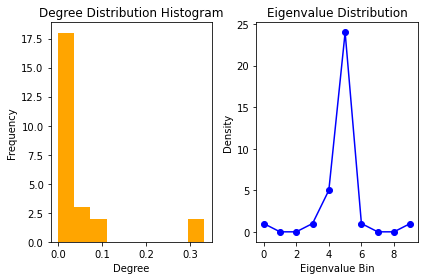

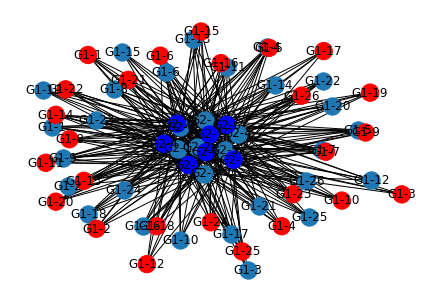

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/lib/histograms.py:852: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)


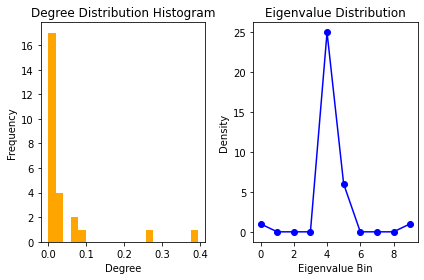

KeyboardInterrupt: 

In [9]:
# Generate 10 random graphs
generated_graphs = 0
num_attempts = 0

# Initialize the DataFrame
request3_df = pd.DataFrame(columns=['n', 'd1', 'd2', 'p', 'nc', 'e', 'le', 'ac', 'sg'])

while generated_graphs < 5:

    n = random.randint(5, 40)
    d1 = random.randint(2, 10)
    d2 = random.randint(2, 10)
    p = random.uniform(0, 1)

    try:

        graph = RSRG(n, d1, d2, p)
        nc, e, le, ac, sg = calculate_metrics(graph)
        draw_distributions(graph, d1, d2)
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore")
            graph = RSRG(n, d1, d2, p)
        # draw the graph
        G = graph
        nx.draw(graph, with_labels=True)
        # Draw the graph
        pos = nx.spring_layout(G)
        colors = ['red' if G.nodes[node]['group'] == 'group1' else 'blue' for node in G.nodes]
        nx.draw_networkx_nodes(G, pos, node_color=colors)
        nx.draw_networkx_edges(G, pos)
        nx.draw_networkx_labels(G, pos)
        plt.show()
        nc, e, le, ac, sg = calculate_metrics(graph)
        draw_distributions(graph, d1, d2)

        # Add the graph and metrics to the DataFrame
        request3_df.loc[generated_graphs] = [n, d1, d2, p, nc, e, le, ac, sg]

        generated_graphs += 1

    except TimeoutError:
        print("Timeout")

    num_attempts += 1

request3_df

## Request 4

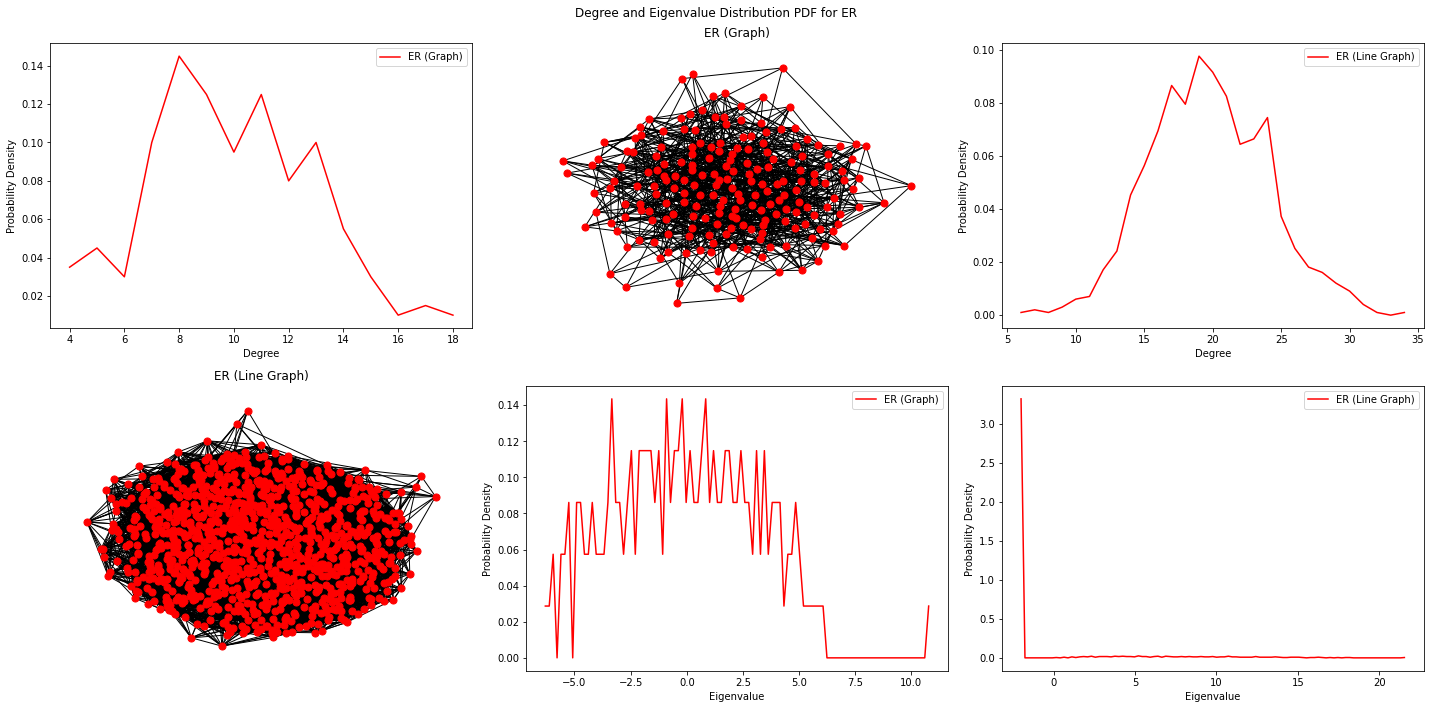

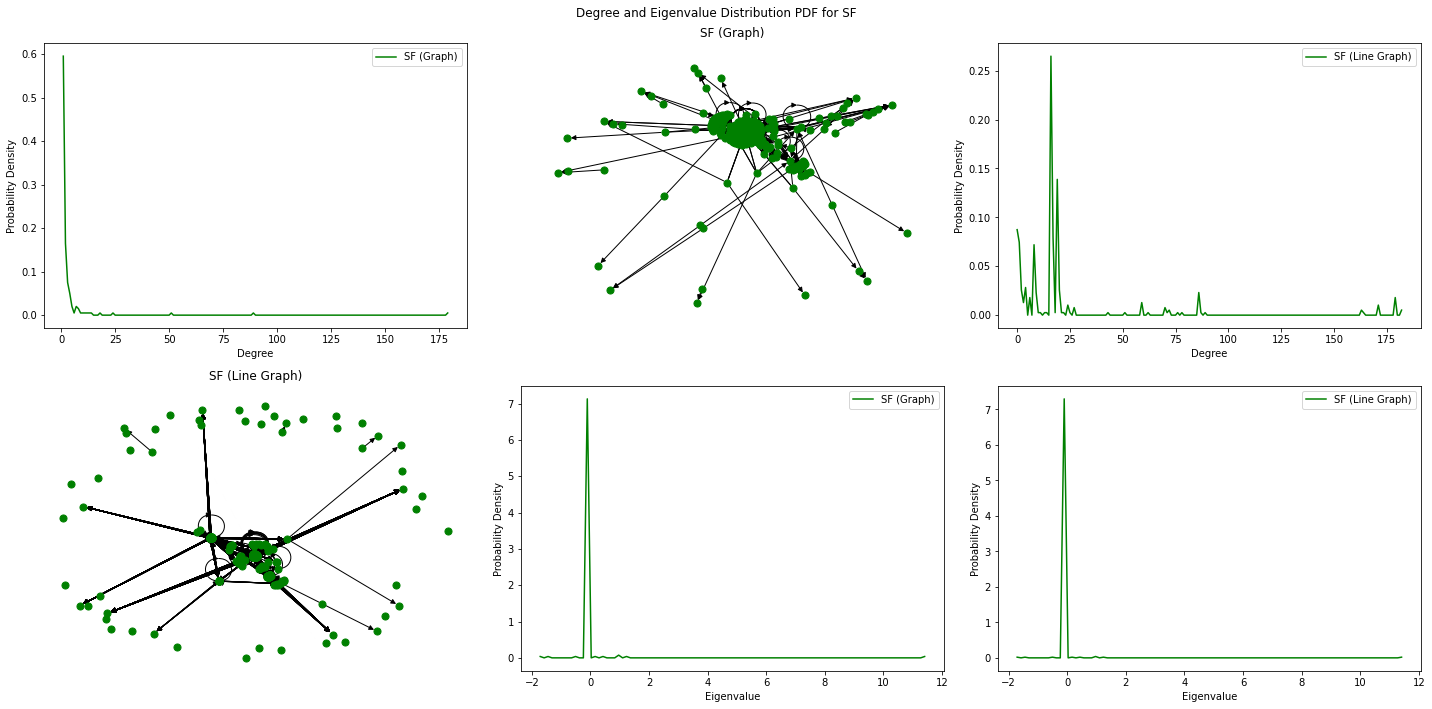

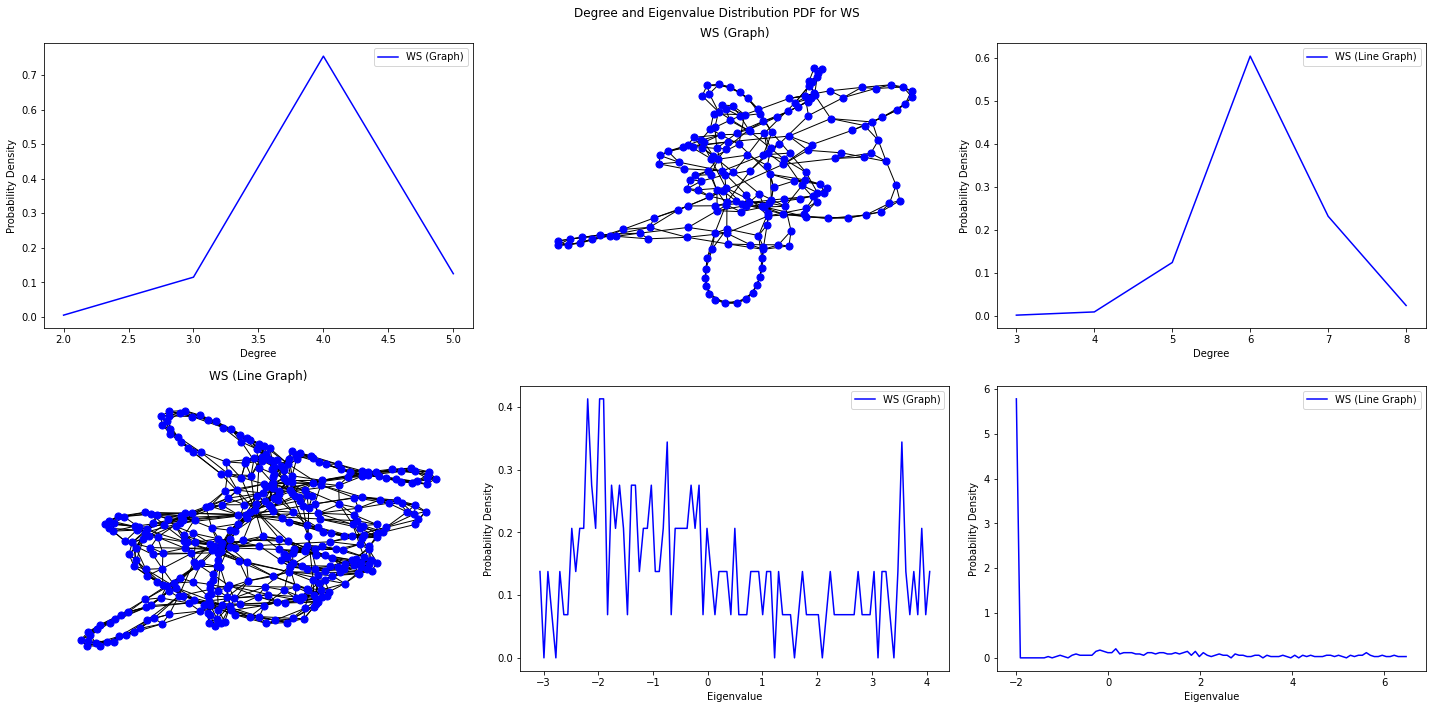

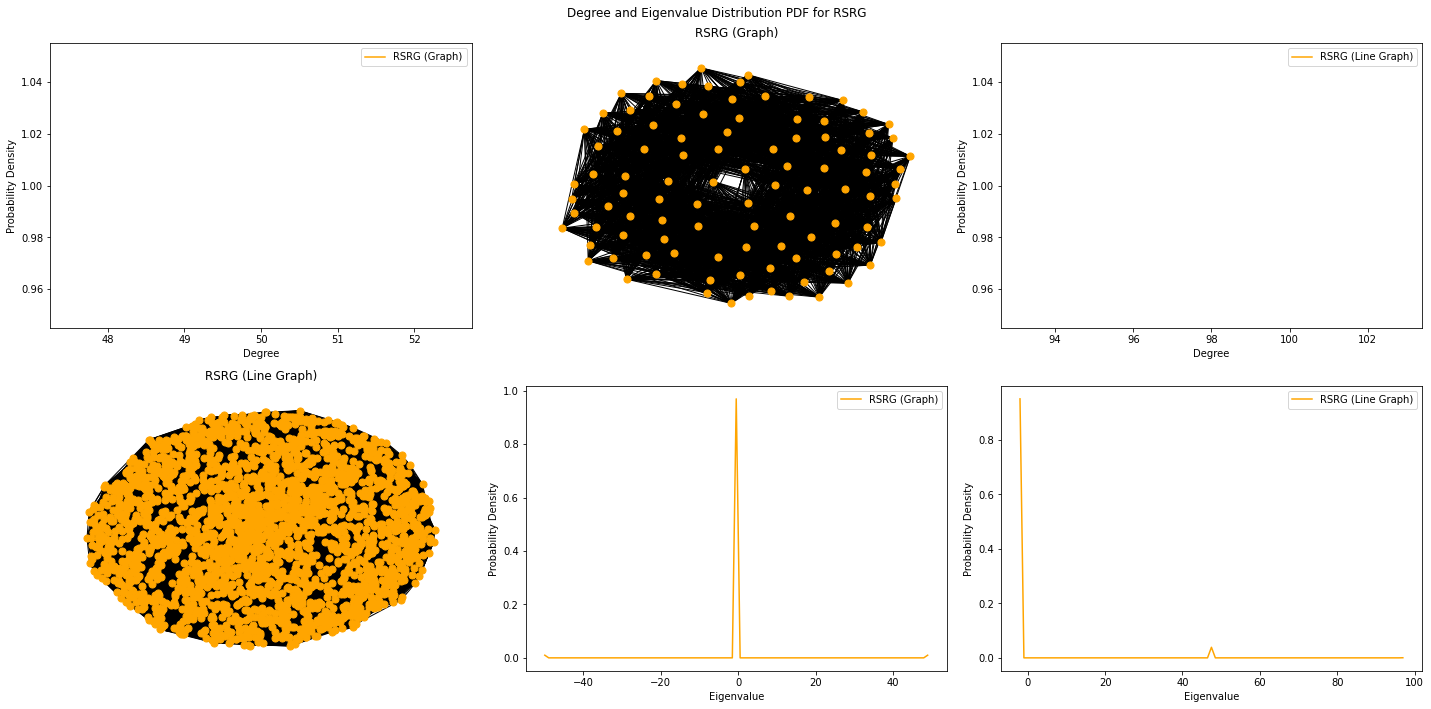

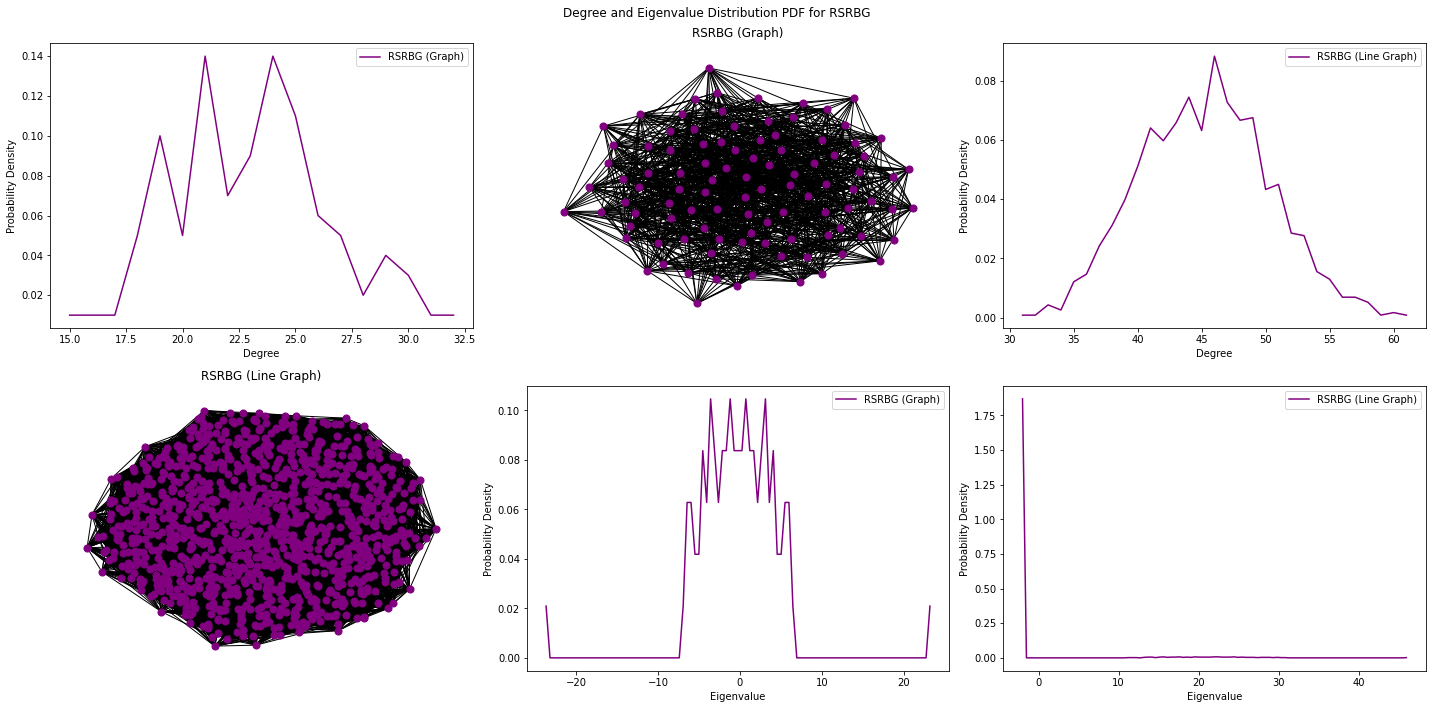

In [26]:
def degree_distribution_pdf(G):
    degrees = dict(G.degree())
    degree_values = np.array(list(degrees.values()))
    bins = np.arange(min(degree_values), max(degree_values) + 2)
    degree_hist, _ = np.histogram(degree_values, bins=bins, density=True)
    return bins[:-1], degree_hist

def eigenvalue_distribution_pdf(G):
    eigenvalues = np.real(np.linalg.eigvals(nx.to_numpy_array(G)))
    bins = np.linspace(min(eigenvalues), max(eigenvalues), num=100)
    eigenvalue_hist, _ = np.histogram(eigenvalues, bins=bins, density=True)
    return bins[:-1], eigenvalue_hist

# Example usage
G_ER = nx.erdos_renyi_graph(n=200, p=0.05)
G_SF = nx.scale_free_graph(n=200)
G_WS = nx.watts_strogatz_graph(n=200, k=4, p=0.1)
G_RSRG = RSRG(100,50,15,0.5)
G_RSRBG = RSRBG(50,50,15,15)

line_G_ER = nx.line_graph(G_ER)
line_G_SF = nx.line_graph(G_SF)
line_G_WS = nx.line_graph(G_WS)
line_G_RSRG = nx.line_graph(G_RSRG)
line_G_RSRBG = nx.line_graph(G_RSRBG)

graphs = [(G_ER, line_G_ER), (G_SF, line_G_SF), (G_WS, line_G_WS), (G_RSRG, line_G_RSRG), (G_RSRBG, line_G_RSRBG)]
labels = ['ER', 'SF', 'WS', 'RSRG', 'RSRBG']
colors = ['red', 'green', 'blue', 'orange', 'purple']

# Plot degree distribution PDF, main graph, and line graph for each graph
for i, (G, line_G) in enumerate(graphs):
    plt.figure(figsize=(20, 10))
    
    # Degree distribution PDF
    plt.subplot(2, 3, 1)
    degree_bins, degree_pdf = degree_distribution_pdf(G)
    plt.plot(degree_bins, degree_pdf, color=colors[i], label=f'{labels[i]} (Graph)')
    plt.xlabel('Degree')
    plt.ylabel('Probability Density')
    plt.legend()
    
    # Main graph
    plt.subplot(2, 3, 2)
    nx.draw(G, node_color=colors[i], node_size=50)
    plt.title(f'{labels[i]} (Graph)')
    
    # Line graph
    plt.subplot(2, 3, 3)
    line_degree_bins, line_degree_pdf = degree_distribution_pdf(line_G)
    plt.plot(line_degree_bins, line_degree_pdf, color=colors[i], label=f'{labels[i]} (Line Graph)')
    plt.xlabel('Degree')
    plt.ylabel('Probability Density')
    plt.legend()
    
    # Line graph
    plt.subplot(2, 3, 4)
    nx.draw(line_G, node_color=colors[i], node_size=50)
    plt.title(f'{labels[i]} (Line Graph)')
    
    # Eigenvalue distribution PDF
    plt.subplot(2, 3, 5)
    eigenvalue_bins, eigenvalue_pdf = eigenvalue_distribution_pdf(G)
    plt.plot(eigenvalue_bins, eigenvalue_pdf, color=colors[i], label=f'{labels[i]} (Graph)')
    plt.xlabel('Eigenvalue')
    plt.ylabel('Probability Density')
    plt.legend()
    
    # Line graph
    plt.subplot(2, 3, 6)
    line_eigenvalue_bins, line_eigenvalue_pdf = eigenvalue_distribution_pdf(line_G)
    plt.plot(line_eigenvalue_bins, line_eigenvalue_pdf, color=colors[i], label=f'{labels[i]} (Line Graph)')
    plt.xlabel('Eigenvalue')
    plt.ylabel('Probability Density')
    plt.legend()
    
    plt.suptitle(f'Degree and Eigenvalue Distribution PDF for {labels[i]}')
    plt.tight_layout()
    plt.show()


## Request 5

Text(0, 0.5, 'Frequency')

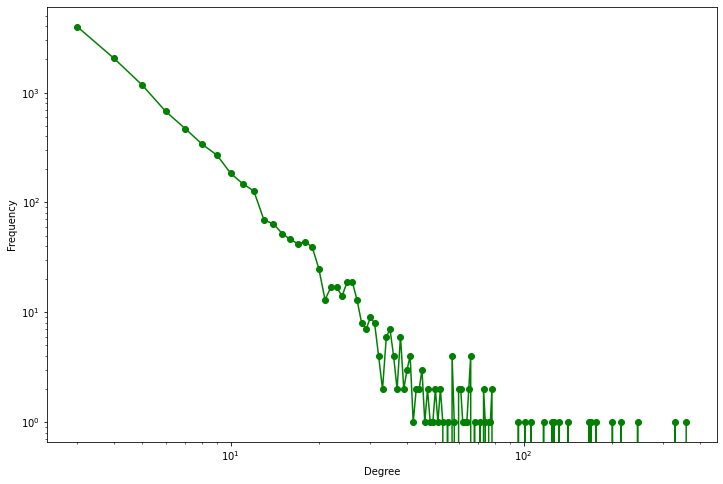

In [55]:
m=3
G = nx.barabasi_albert_graph(10000, 3)

degree_freq = nx.degree_histogram(G)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees[m:], degree_freq[m:],'go-') 
plt.xlabel('Degree')
plt.ylabel('Frequency')

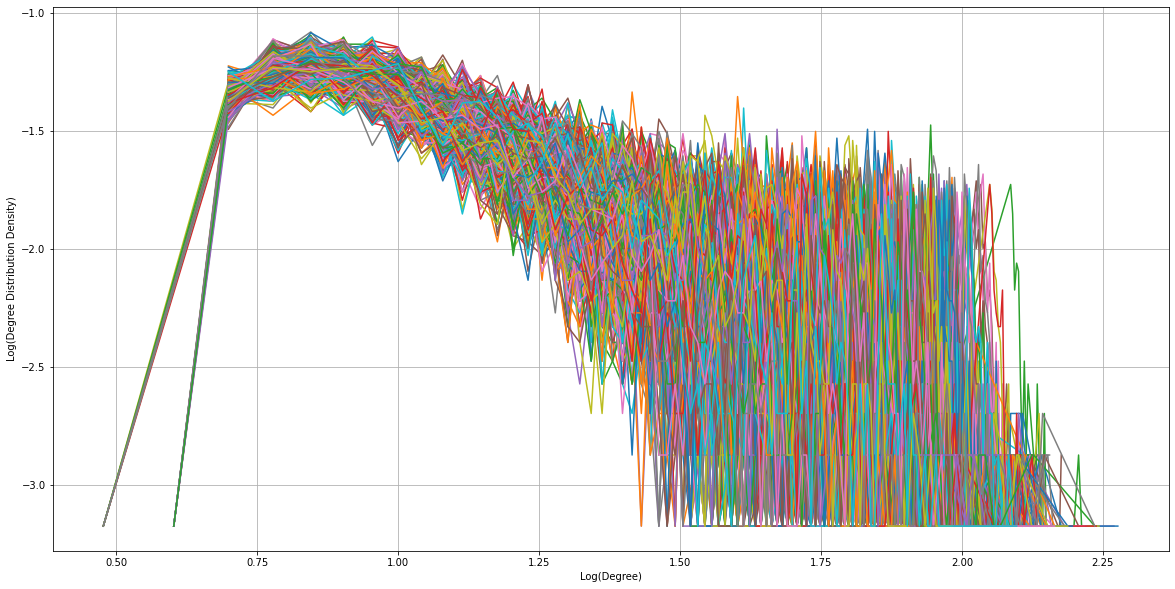

In [61]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def compute_degree_distribution_density(graph):
    degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)
    degree_values, degree_counts = np.unique(degree_sequence, return_counts=True)
    degree_distribution = degree_counts / len(graph)
    return degree_values, degree_distribution

num_graphs = 1000
N = 500
avg_degree = 3

gammas = np.linspace(2.0, 3.0, num_graphs)  # Range of gamma values

fig, ax = plt.subplots(figsize=(20 ,10))

for gamma in gammas:
    # Generate scale-free graph
    G = nx.barabasi_albert_graph(N, avg_degree)
    
    # Generate line graph
    line_graph = nx.line_graph(G)
    
    # Compute degree distribution density of line graph
    degree_values, degree_distribution = compute_degree_distribution_density(line_graph)
    
    # Plot the logarithm of the degree distribution density
    log_degree_values = np.log10(degree_values)
    log_degree_distribution = np.log10(degree_distribution)
    ax.plot(log_degree_values, log_degree_distribution)

ax.set_xlabel("Log(Degree)")
ax.set_ylabel("Log(Degree Distribution Density)")
ax.grid(True)
plt.show()


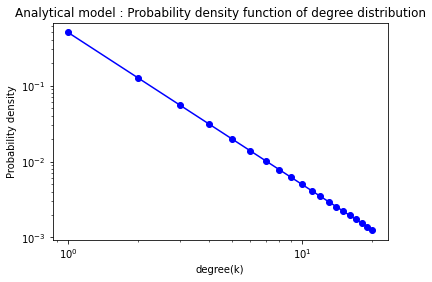

In [35]:
def degree_distribution(k, gamma):
    return (2**(-gamma + 1) * (gamma - 1) * (k**(-gamma)))

def draw_distributions_sf():
    gamma = 2.0
    degrees = range(1, 21)

    # Calculate the probability density function for each degree
    probabilities = [degree_distribution(k, gamma) for k in degrees]

    # Draw the graph of the probability density function of the degree distribution
    plt.plot(degrees, probabilities, 'bo-')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('degree(k)')
    plt.ylabel('Probability density')
    plt.title('Analytical model : Probability density function of degree distribution')
    plt.show()

draw_distributions_sf()

<Figure size 1440x720 with 0 Axes>

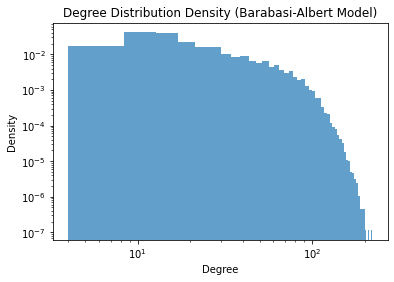

In [48]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def generate_barabasi_albert_graph(N, avg_degree):
    ba_graphs = []
    for _ in range(1000):
        ba_graph = nx.barabasi_albert_graph(N, avg_degree)
        ba_graphs.append(ba_graph)
    return ba_graphs

def plot_degree_distribution(ba_graphs):
    plt.figure(figsize=(20,10))
    fig, ax = plt.subplots()
    degrees = []
    for ba_graph in ba_graphs:
        line_graph = nx.line_graph(ba_graph)
        degree_sequence = [d for n, d in line_graph.degree()]
        degrees.extend(degree_sequence)
    density, bins, _ = ax.hist(degrees, bins=50, density=True, alpha=0.7, log=True)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Degree')
    ax.set_ylabel('Density')
    ax.set_title('Degree Distribution Density (Barabasi-Albert Model)')
    plt.show()

N = 500
avg_degree = 4

ba_graphs = generate_barabasi_albert_graph(N, avg_degree)
plot_degree_distribution(ba_graphs)


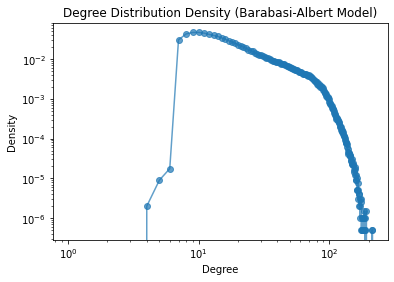

In [46]:
# import networkx as nx
# import numpy as np
# import matplotlib.pyplot as plt

# def generate_barabasi_albert_graph(N, avg_degree):
#     ba_graphs = []
#     for _ in range(1000):
#         ba_graph = nx.barabasi_albert_graph(N, avg_degree//2)
#         ba_graphs.append(ba_graph)
#     return ba_graphs

# def plot_degree_distribution(ba_graphs):
#     degrees = []
#     for ba_graph in ba_graphs:
#         line_graph = nx.line_graph(ba_graph)
#         degree_sequence = [d for n, d in line_graph.degree()]
#         degrees.extend(degree_sequence)
#     degree_counts = np.bincount(degrees)
#     x = np.arange(len(degree_counts))
#     y = degree_counts / degree_counts.sum()
#     plt.plot(x, y, marker='o', linestyle='-', alpha=0.7)
#     plt.xscale('log')
#     plt.yscale('log')
#     plt.xlabel('Degree')
#     plt.ylabel('Density')
#     plt.title('Degree Distribution Density (Barabasi-Albert Model)')
#     plt.show()

# N = 500
# avg_degree = 4

# ba_graphs = generate_barabasi_albert_graph(N, avg_degree)
# plot_degree_distribution(ba_graphs)


## Request 6

Functions

In [11]:
def random_disconnect(graph):
    # Copy the graph to avoid modifying the original graph
    disconnected_graph = graph.copy()
    
    # Randomly disconnect edges until the graph becomes disconnected
    while nx.is_connected(disconnected_graph):
        # Get a random edge from the graph
        edge_list = list(disconnected_graph.edges())
        random_edge = random.choice(edge_list)
        
        # Remove the random edge from the graph
        disconnected_graph.remove_edge(*random_edge)
    
    # Calculate the probability of disconnection
    probability = len(disconnected_graph.edges()) / len(graph.edges())
    
    return probability

def calculate_nodal_connectivity(graph):
    nodal_connectivity = float('inf')
    
    # Iterate over all pairs of nodes in the graph
    for u in graph.nodes():
        for v in graph.nodes():
            if u != v:
                # Calculate the minimum number of nodes that need to be removed to disconnect u and v
                connectivity = nx.node_connectivity(graph, u, v)
                if connectivity < nodal_connectivity:
                    nodal_connectivity = connectivity
    
    return nodal_connectivity


def calculate_edge_connectivity(graph):
    edge_connectivity = float('inf')
    
    # Iterate over all pairs of nodes in the graph
    for u in graph.nodes():
        for v in graph.nodes():
            if u != v:
                # Calculate the minimum number of edges that need to be removed to disconnect u and v
                connectivity = nx.edge_connectivity(graph, u, v)
                if connectivity < edge_connectivity:
                    edge_connectivity = connectivity
    
    return edge_connectivity

Codes

random reqular graph - probability of disconnection

In [12]:
num_trials = 100
num_nodes = 500
num_edges = 1500
degree = 6

disconnection_probabilities = []

for _ in range(num_trials):
    # Generate a 6-regular graph with the specified number of nodes and edges
    graph = nx.random_regular_graph(degree, num_nodes)
    
    # Randomly disconnect edges and calculate the probability of disconnection
    probability = random_disconnect(graph)
    
    # Store the probability of disconnection
    disconnection_probabilities.append(probability)

# Calculate the average probability of disconnection
avg_probability = sum(disconnection_probabilities) / num_trials

print("Average probability of disconnection:", avg_probability)


Average probability of disconnection: 0.6616133333333332


RSRBG - probability of disconnection

In [42]:
num_trials = 10
num_nodes = 500
d1 = 4
d2 = 12
n1 = num_nodes*d2/(d1+d2)
n2 = num_nodes*d1/(d1+d2)

disconnection_probabilities = []

for _ in range(num_trials):
    # Generate a 6-regular graph with the specified number of nodes and edges
    graph = RSRBG(n1,n2,d1,d2, draw_plot=False)
    
    # Randomly disconnect edges and calculate the probability of disconnection
    probability = random_disconnect(graph)
    
    # Store the probability of disconnection
    disconnection_probabilities.append(probability)

# Calculate the average probability of disconnection
avg_probability = sum(disconnection_probabilities) / num_trials

print("Average probability of disconnection:", avg_probability)

Average probability of disconnection: 0.5011107156690038


RSRBG - calculating connectivity

In [43]:
# Define the number of trials, nodes, edges, and degree
num_trials = 10

# Create an empty DataFrame to store the results
data = pd.DataFrame(columns=['nc', 'gc', 'ec'])

for _ in range(num_trials):
    # Generate a RSRGB graph with the specified number of nodes and edges
    g =RSRBG(10,20,5,6, draw_plot=False)
    
    # Randomly disconnect edges and calculate the probability of disconnection
    probability = random_disconnect(g)
    
    nc = calculate_nodal_connectivity(g)
    ec = calculate_edge_connectivity(g)
    gc = calculate_algebraic_connectivity(g)
    
    # Append the results to the DataFrame
    data.loc[len(data)] = [nc, gc, ec]

# Print the DataFrame
data


,nc,gc,ec
0,6.0,5.672632,6.0
1,6.0,5.485842,6.0
2,6.0,5.572761,6.0
3,6.0,5.569225,6.0
4,6.0,5.438741,6.0
5,6.0,5.525601,6.0
6,6.0,5.839938,6.0
7,6.0,5.282178,6.0
8,6.0,5.629057,6.0
9,6.0,5.606758,6.0


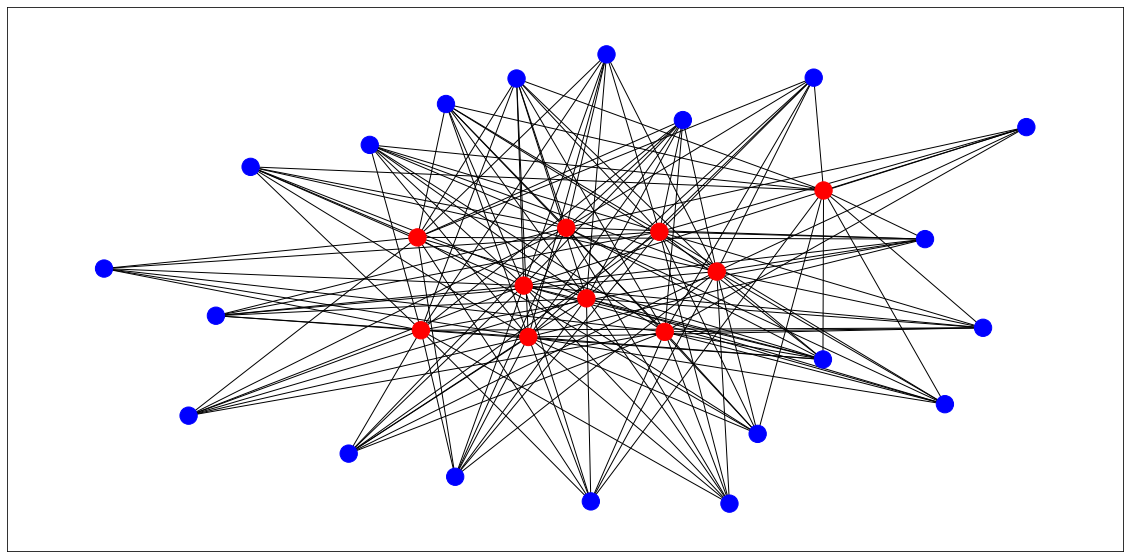

KeyboardInterrupt: 

In [49]:
def random_disconnect(graph):
    # Copy the graph to avoid modifying the original graph
    disconnected_graph = graph.copy()
    
    # Randomly disconnect edges until the graph becomes disconnected
    while nx.is_connected(disconnected_graph):
        # Get a random edge from the graph
        edge_list = list(disconnected_graph.edges())
        random_edge = random.choice(edge_list)
        
        # Remove the random edge from the graph
        disconnected_graph.remove_edge(*random_edge)

        nc = calculate_nodal_connectivity(disconnected_graph)
        ec = calculate_edge_connectivity(disconnected_graph)
        gc = calculate_algebraic_connectivity(disconnected_graph)
            # Append the results to the DataFrame
        data.loc[len(data)] = [nc, gc, ec]
    
    # Calculate the probability of disconnection
    probability = len(disconnected_graph.edges()) / len(graph.edges())
    
    return probability

# Define the number of trials, nodes, edges, and degree
num_trials = 5

# Create an empty DataFrame to store the results
data = pd.DataFrame(columns=['nc', 'gc', 'ec'])

for _ in range(num_trials):
    # Generate a RSRGB graph with the specified number of nodes and edges
    g = RSRBG(10,20,5,6)
    
    # Randomly disconnect edges and calculate the probability of disconnection
    probability = random_disconnect(g)

# Print the DataFrame
data

## Request 7

Functions

In [1]:
def calculate_girth(graph):
    girth = float('inf')  # Initialize girth as infinity

    # Iterate over all nodes in the graph
    for node in graph.nodes:
        try:
            # Find the shortest cycle starting from the current node
            cycle = nx.find_cycle(graph, source=node)
            cycle_length = len(cycle)
            
            # Update girth if the cycle length is smaller than the current girth
            if cycle_length < girth:
                girth = cycle_length
        except nx.NetworkXNoCycle:
            # Ignore nodes that are not part of any cycle
            pass
    return girth

def generate_cage(girth):
    if girth % 2 == 0 or girth < 5:
        raise ValueError("Invalid girth value. The girth should be an odd integer greater than or equal to 5.")

    # Generate a Moore graph with the specified girth and degree 3
    graph = nx.moore_graph(girth, 3)
    return graph

def draw_graph(graph):
    plt.figure(figsize=(10,5))
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph, pos, node_size=200, node_color='lightblue')
    nx.draw_networkx_edges(graph, pos, width=1, alpha=0.5)
    nx.draw_networkx_labels(graph, pos, font_size=10)
    plt.title("Graph Visualization")
    # plt.axis('off')
    plt.show()


Code

Girth of last 7 request graphs

In [13]:
# Create graphs
G_ER = nx.erdos_renyi_graph(n=500, p=0.05)
G_SF = nx.scale_free_graph(n=500)
G_WS = nx.watts_strogatz_graph(n=500, k=4, p=0.1)
G_RSRG = RSRG(500,4,12,0.5, draw_plot=False)    # edges = 6244
G_RR = nx.random_regular_graph(6, 500)  # degree = 6, Nodes = 500
G_RSRBG = RSRBG(d1=4,d2=12,n1=375,n2=125, draw_plot=False)   # edges = 3793 , nodes = 500

# Calculate girth
print("Girth of ER : ",calculate_girth(G_ER))
print("Girth of SF : ",calculate_girth(G_SF))
print("Girth of WS : ",calculate_girth(G_WS))
print("Girth of random regular : ",calculate_girth(G_RR))
print("Girth of RSRG : ",calculate_girth(G_RSRG))
print("Girth of RSRBG : ",calculate_girth(G_RSRBG))

Girth of ER :  4
Girth of SF :  3
Girth of WS :  3
Girth of random regular :  7
Girth of RSRG :  8
Girth of RSRBG :  4


Comparing girth of 3 graphs

In [7]:
# RSRBG(6,2)
rsrbg = RSRBG(30,20,6,2,draw_plot=False)
print("Girth of RSRBG graph : ",calculate_girth(rsrbg))
# draw_graph(generate_cage(g_rsrbg))

# RSRG(6,2)
rsrg = RSRG(50,6,2,0.1,draw_plot=False)
print("Girth of RSRG graph : ",calculate_girth(rsrg))
# draw_graph(generate_cage(g_rsrg))

# Cubic graph
d1 = 3  # Degree of each node
num_nodes = 10  # Number of nodes in the graph
cubic_graph = nx.random_regular_graph(d1, num_nodes)
print("Girth of Cubic graph : ",calculate_girth(cubic_graph))


Girth of RSRBG graph :  4
Girth of RSRG graph :  4
Girth of Cubic graph :  5


## Request 8

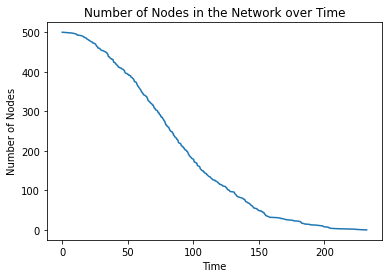

In [7]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Generate scale-free network
G_SF = nx.scale_free_graph(n=500)

# Set parameters for the Weibull distribution
shape = 2.0
scale = 100

# Simulate node lifetimes
node_lifetimes = np.random.weibull(shape, size=len(G_SF)) * scale

# Sort the lifetimes in ascending order
node_lifetimes = np.sort(node_lifetimes)

# Initialize lists to store the number of active nodes and corresponding time steps
active_nodes = [len(G_SF)]
time_steps = [0]

# Simulate the network over time
for i in range(len(node_lifetimes)):
    # Remove the node from the network
    G_SF.remove_node(i)

    # Update the number of active nodes and time step
    active_nodes.append(len(G_SF))
    time_steps.append(node_lifetimes[i])

# Plot the number of nodes over time
plt.plot(time_steps, active_nodes)
plt.xlabel('Time')
plt.ylabel('Number of Nodes')
plt.title('Number of Nodes in the Network over Time')
plt.show()


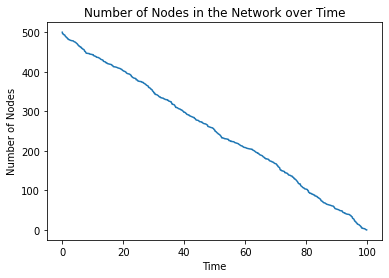

In [10]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Generate scale-free network
G_SF = nx.scale_free_graph(n=500)

# Set parameters for the uniform distribution
scale = 100

# Simulate node lifetimes
node_lifetimes = np.random.uniform(0, scale, size=len(G_SF))

# Sort the lifetimes in ascending order
node_lifetimes = np.sort(node_lifetimes)

# Initialize lists to store the number of active nodes and corresponding time steps
active_nodes = [len(G_SF)]
time_steps = [0]

# Simulate the network over time
for i in range(len(node_lifetimes)):
    # Remove the node from the network
    G_SF.remove_node(i)

    # Update the number of active nodes and time step
    active_nodes.append(len(G_SF))
    time_steps.append(node_lifetimes[i])

# Plot the number of nodes over time
plt.plot(time_steps, active_nodes)
plt.xlabel('Time')
plt.ylabel('Number of Nodes')
plt.title('Number of Nodes in the Network over Time')
plt.show()


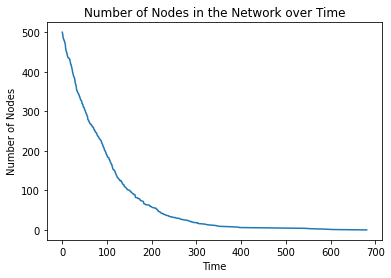

In [11]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Generate scale-free network
G_SF = nx.scale_free_graph(n=500)

# Set parameters for the exponential distribution
scale = 100

# Simulate node lifetimes
node_lifetimes = np.random.exponential(scale, size=len(G_SF))

# Sort the lifetimes in ascending order
node_lifetimes = np.sort(node_lifetimes)

# Initialize lists to store the number of active nodes and corresponding time steps
active_nodes = [len(G_SF)]
time_steps = [0]

# Simulate the network over time
for i in range(len(node_lifetimes)):
    # Remove the node from the network
    G_SF.remove_node(i)

    # Update the number of active nodes and time step
    active_nodes.append(len(G_SF))
    time_steps.append(node_lifetimes[i])

# Plot the number of nodes over time
plt.plot(time_steps, active_nodes)
plt.xlabel('Time')
plt.ylabel('Number of Nodes')
plt.title('Number of Nodes in the Network over Time')
plt.show()


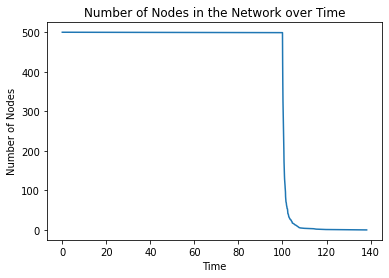

In [16]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Generate scale-free network
G_SF = nx.scale_free_graph(n=500)

# Set parameters for the Pareto distribution
shape = 2.0
scale = 100

# Simulate node lifetimes
node_lifetimes = np.random.pareto(shape, size=len(G_SF)) + scale

# Sort the lifetimes in ascending order
node_lifetimes = np.sort(node_lifetimes)

# Initialize lists to store the number of active nodes and corresponding time steps
active_nodes = [len(G_SF)]
time_steps = [0]

# Simulate the network over time
for i in range(len(node_lifetimes)):
    # Remove the node from the network
    G_SF.remove_node(i)

    # Update the number of active nodes and time step
    active_nodes.append(len(G_SF))
    time_steps.append(node_lifetimes[i])

# Plot the number of nodes over time
plt.plot(time_steps, active_nodes)
plt.xlabel('Time')
plt.ylabel('Number of Nodes')
plt.title('Number of Nodes in the Network over Time')
plt.show()


## Request 9

# GUI